<a href="https://colab.research.google.com/github/hanafimajid/h2o-mtr/blob/main/h2o_scm20d.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Installing the H2O package
!pip install h2o
# Importing necessary packages
import h2o
from h2o.automl import H2OAutoML

# Initialize H2O
h2o.init()

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 265.6/265.6 MB 1.5 MB/s eta 0:00:00
Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.22" 2024-01-16; OpenJDK Runtime Environment (build 11.0.22+7-post-Ubuntu-0ubuntu222.04.1); OpenJDK 64-Bit Server VM (build 11.0.22+7-post-Ubuntu-0ubuntu222.04.1, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.10/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpw2atjt4y
  JVM stdout: /tmp/tmpw2atjt4y/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpw2atjt4y/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,04 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.1
H2O_cluster_version_age:,22 days
H2O_cluster_name:,H2O_from_python_unknownUser_ilrddc
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.170 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


In [ ]:
#importing data from a local CSV file
from google.colab import files
uploaded = files.upload()

Saving scm20d.csv to scm20d.csv


In [ ]:
import pandas as pd
df = pd.read_csv("scm20d.csv")
df.head()
y_col = [
'LBL',
'MTLp2A',
'MTLp3A',
'MTLp4A',
'MTLp5A',
'MTLp6A',
'MTLp7A',
'MTLp8A',
'MTLp9A',
'MTLp10A',
'MTLp11A',
'MTLp12A',
'MTLp13A',
'MTLp14A',
'MTLp15A',
'MTLp16A'
]
y = df[y_col]
#x_col_id = ['id']
#x_id = df[x_col_id]
y.head()
#X_col = ['Xloc','Yloc','Cr','Ni','Zn','Co']
#X = df[X_col]
#X = df[df.columns.drop(y)]
#X=df.drop(columns=['id'])
X=df[df.columns.drop(y)]
#X=df.drop(y,x_id)
y.head()


,LBL,MTLp2A,MTLp3A,MTLp4A,MTLp5A,MTLp6A,MTLp7A,MTLp8A,MTLp9A,MTLp10A,MTLp11A,MTLp12A,MTLp13A,MTLp14A,MTLp15A,MTLp16A
0,1424,1519,1507,1581,1879,1776,1747,1905,1414,1336,1409,1535,1795,1871,1783,1649
1,1432,1688,1532,1639,1904,1841,1794,2060,1270,1404,1405,1486,1786,2077,1803,1650
2,1391,1612,1547,1599,1977,1853,1774,1876,1397,1444,1400,1505,1871,2050,1751,1653
3,1424,1544,1414,1558,1937,1879,1760,1820,1315,1477,1419,1546,1833,2070,1798,1645
4,1444,1536,1499,1598,1915,1854,1780,1846,1435,1412,1305,1455,1847,2024,1775,1646


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size = 0.20, random_state = 123)

In [ ]:
X_train.fillna(X_train.mean(), inplace=True)
X_test.fillna(X_test.mean(), inplace=True)
y_train.fillna(y_train.mean(), inplace=True)
y_test.fillna(y_test.mean(), inplace=True)
X_train.head(10)

,timeunit,storageCost,interestRate,compidx0lt2,compidx4lt2,compidx6lt2,compidx8lt2,compidx10lt2,compidx12lt2,compidx14lt2,...,demandseg2,demandseg2l1,demandseg2l2,demandseg2l4,demandseg2l8,demandseg3,demandseg3l1,demandseg3l2,demandseg3l4,demandseg3l8
85,94,27,8,845.237,175.886,147.439,117.052,113.234,229.394,171.628,...,47,30,41,39,29,36,34,51,39,36
6633,117,39,7,556.000,146.000,146.000,58.000,55.000,500.000,688.000,...,68,49,41,48,38,72,74,57,52,30
7695,53,50,7,727.294,224.748,174.349,80.553,52.743,216.380,230.065,...,32,30,24,33,40,86,49,67,64,72
1969,101,33,9,520.938,280.803,289.683,121.874,107.961,165.925,160.320,...,63,71,70,65,76,36,51,69,53,52
4989,146,26,6,1041.000,355.000,319.000,149.000,161.000,175.000,175.000,...,116,133,129,104,122,90,101,101,95,75
4437,152,39,12,520.408,133.923,146.218,63.468,56.422,180.108,162.937,...,96,90,92,87,101,85,78,99,76,98
732,178,27,10,585.458,138.583,136.791,61.052,58.265,168.506,167.549,...,18,33,27,38,23,32,18,36,31,32
1555,63,41,8,576.592,142.318,137.749,78.474,61.093,167.208,175.069,...,139,115,110,130,121,80,76,81,90,73
7053,162,25,12,529.000,134.000,140.000,54.000,54.000,175.000,175.000,...,72,73,60,69,53,50,51,60,73,74
803,61,46,9,1089.154,183.208,139.752,74.861,64.229,171.975,168.307,...,113,86,111,86,102,103,98,75,97,97


In [ ]:
from h2o.sklearn import H2OAutoMLRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error

In [ ]:
class MultiOutputTP(object):
  def __init__(self, *args, **kwargs):
    self.args = args
    self.kwargs = kwargs
  def fit(self, X, y):
    X, y = map(np.atleast_2d, (X, y))
    assert X.shape[0] == y.shape[0]
    yy = y.shape[1]
    self.regs = []
    for i in range(yy):
#while i <= Ny:
      #reg = TPOTRegressor(generations=5, population_size=50,verbosity=2, random_state=123,n_jobs=1, max_time_mins=None, max_eval_time_mins=5, cv=10,scoring='neg_mean_squared_error')
      #reg = LinearSVR(epsilon=0.0, tol=0.0001, C=1.0, loss='epsilon_insensitive', fit_intercept=True, intercept_scaling=1.0, dual=True, verbose=1, random_state=123, max_iter=10000)
      reg=H2OAutoMLRegressor(stopping_metric="RMSE",max_runtime_secs=240,keep_cross_validation_predictions = True, max_models=100, seed=42, sort_metric="RMSE")
      #reg=H2OAutoML(stopping_metric="RMSE",sort_metric="RMSE",nfolds=10)
      Xi = np.hstack([X, y[:, :i]])
      yi = y[:, i]
      #h2o.make_leaderboard(reg,extra_columns = 'ALL')


      self.regs.append(reg.fit(Xi, yi))


    return self
  def predict(self, X):
    y = np.empty([X.shape[0], len(self.regs)])
    for i, reg in enumerate(self.regs):
      y[:, i] = reg.predict(np.hstack([X, y[:, :i]]))
    return y

In [ ]:
import numpy as np

#decorators.MAX_EVAL_SECS = 240
reg2 = MultiOutputTP(1).fit(X_train, y_train)



Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |█████████████████████████████████

In [ ]:
y_test

,LBL,MTLp2A,MTLp3A,MTLp4A,MTLp5A,MTLp6A,MTLp7A,MTLp8A,MTLp9A,MTLp10A,MTLp11A,MTLp12A,MTLp13A,MTLp14A,MTLp15A,MTLp16A
4978,1763,1920,1780,1998,2298,2244,2377,2428,1603,1926,1720,1820,2251,2383,2020,2208
6853,1245,1232,1472,1489,1402,1471,1572,1632,1614,1618,1776,1647,1691,1807,1782,1801
6006,1221,1286,1268,1304,1520,1597,1512,1634,1170,1229,1296,1260,1579,1682,1667,1702
7649,980,1082,1108,1142,1302,1371,2043,1543,1015,1189,1120,1103,2151,1914,2045,2330
1183,1020,1204,1103,1315,1430,1611,1469,1690,961,1172,1087,1230,1198,1440,1325,1516
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4659,1141,1176,1170,1271,1155,1138,1133,1271,941,1015,1059,1161,1453,1503,1479,1597
3144,1434,1673,1415,1505,1766,1649,1508,1531,1507,1705,1346,1429,1869,2130,1545,1610
5195,881,979,935,1034,1504,1602,1558,1658,927,1025,981,1080,1302,1376,1350,1431
2815,1205,1299,1277,1429,1534,1648,1631,1755,1175,1240,1231,1339,1530,1604,1620,1710


In [ ]:
X_test

,timeunit,storageCost,interestRate,compidx0lt2,compidx4lt2,compidx6lt2,compidx8lt2,compidx10lt2,compidx12lt2,compidx14lt2,...,demandseg2,demandseg2l1,demandseg2l2,demandseg2l4,demandseg2l8,demandseg3,demandseg3l1,demandseg3l2,demandseg3l4,demandseg3l8
4978,135,26,6,1000.000,286.000,204.000,200.000,142.000,166.000,163.000,...,117,92,109,97,103,75,80,69,49,53
6853,149,40,11,591.000,134.000,150.000,58.000,58.000,167.000,162.000,...,111,113,127,118,103,34,21,32,29,29
6006,44,43,10,581.000,148.000,148.000,53.000,56.000,171.000,166.000,...,31,36,39,27,35,27,40,35,29,28
7649,195,36,6,594.754,202.355,167.652,61.234,62.162,182.925,183.546,...,67,50,53,54,47,88,69,112,71,89
1183,67,33,10,591.548,263.432,268.340,55.227,57.447,235.240,236.902,...,32,26,39,32,32,116,89,100,100,101
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4659,189,39,10,580.000,146.000,146.000,57.000,54.000,175.000,175.000,...,95,100,114,106,79,23,13,22,29,26
3144,162,25,9,568.729,154.855,139.774,123.034,137.413,168.799,169.994,...,103,129,103,107,93,40,29,42,23,51
5195,165,48,8,589.000,147.000,147.000,52.000,52.000,180.000,181.000,...,30,25,39,22,22,50,58,71,56,71
2815,20,27,11,754.407,209.848,230.640,61.677,65.927,211.550,174.216,...,85,78,73,97,102,32,31,23,23,31


In [ ]:
Ypred2 = reg2.predict(X_test)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%


/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%
Parse progress: |

/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


████████████████████████████████████████████████████████████████| (done) 100%
drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%


/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%


/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%
Parse progress: |

/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


████████████████████████████████████████████████████████████████| (done) 100%
gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%
Parse progress: |

/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


████████████████████████████████████████████████████████████████| (done) 100%
drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%
Parse progress: |

/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


████████████████████████████████████████████████████████████████| (done) 100%
gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%
Parse progress: |

/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


████████████████████████████████████████████████████████████████| (done) 100%
drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%
Parse progress: |

/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


████████████████████████████████████████████████████████████████| (done) 100%
drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%
Parse progress: |

/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


████████████████████████████████████████████████████████████████| (done) 100%
drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%
Parse progress: |

/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


████████████████████████████████████████████████████████████████| (done) 100%
drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%
Parse progress: |

/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


████████████████████████████████████████████████████████████████| (done) 100%
gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%
Parse progress: |

/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


████████████████████████████████████████████████████████████████| (done) 100%
drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%
Parse progress: |

/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


████████████████████████████████████████████████████████████████| (done) 100%
gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%


/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%


/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


In [ ]:
Ypred2

array([[1669.65183141, 1755.73684211, 1819.30434783, ..., 2295.26666504,
        2393.32477482, 2331.28571429],
       [1230.39727031, 1279.79323216, 1409.99420431, ..., 1680.83599854,
        1651.28697206, 1706.63423998],
       [1131.26383808, 1192.91447368, 1179.19947881, ..., 1442.54356934,
        1439.81999813, 1511.98879444],
       ...,
       [ 910.70924473,  978.38596545,  979.28242161, ..., 1369.58695068,
        1402.61318251, 1471.3510219 ],
       [1187.45322958, 1246.19736842, 1285.36956522, ..., 1542.8693457 ,
        1544.76926536, 1599.35819665],
       [1378.34750622, 1451.25764546, 1456.40926195, ..., 1817.89173096,
        1763.875227  , 1856.91194744]])

In [ ]:
from sklearn.metrics import r2_score
r2 = np.abs(r2_score(y_test, Ypred2))
print('r2 score for perfect model is', r2)

r2 score for perfect model is 0.8613983779708796


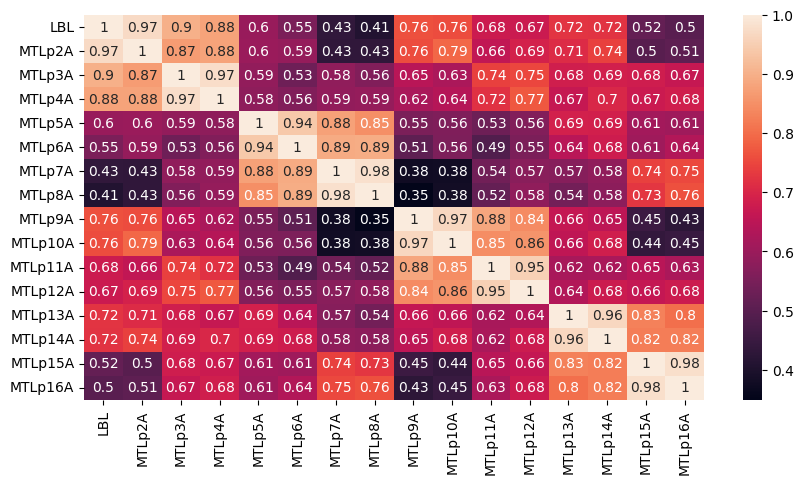

In [ ]:
from tables import Column
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
# taking all rows but only 6 columns
df_small=pd.DataFrame(Ypred2)
#df_small = y_test.iloc[:,:3]
features=['LBL',
'MTLp2A',
'MTLp3A',
'MTLp4A',
'MTLp5A',
'MTLp6A',
'MTLp7A',
'MTLp8A',
'MTLp9A',
'MTLp10A',
'MTLp11A',
'MTLp12A',
'MTLp13A',
'MTLp14A',
'MTLp15A',
'MTLp16A']
correlation_mat = df_small.corr('pearson')
plt.figure(figsize = (10,5))
sns.heatmap(correlation_mat, annot = True,yticklabels=features,xticklabels=features)
plt.show()

In [ ]:
import math
import numpy as np
from statistics import mean
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
rmse3=math.sqrt(mean_squared_error(y_test, Ypred2))
print('RMSE  is',rmse3)
mae3=mean_absolute_error(y_test, Ypred2)
print('MAE  is',mae3)




# Calculate RMSE for each output
rmse_per_output = np.sqrt(mean_squared_error(y_test, Ypred2, multioutput='raw_values'))
print('rmse_per_output:',rmse_per_output)

def relative_root_mean_squared_error(true, pred):
    n = len(true) # update
    num = np.sum(np.square(true - pred)) / n  # update
    den = np.sum(np.square(pred))
    squared_error = num/den
    rrmse_loss = np.sqrt(squared_error)
    return rrmse_loss


rrmse3=relative_root_mean_squared_error(y_test,Ypred2)
arrmse3=np.mean(rrmse3)
percentage_average_relative_rmse3 = arrmse3 * 100
print("relative_root_mean_squared_error =", rrmse3)
print("arrmse =", arrmse3)
print(f"Percentage arrmse = {percentage_average_relative_rmse3:.2f}%")

RMSE  is 99.07271186917183
MAE  is 64.10562102255369
rmse_per_output: [ 69.22067148  71.76662563  74.38727798  84.47702363  99.15485353
 109.70243222 110.62439006 130.15554378  75.64563714  92.6842141
  83.58871978  90.97266116 106.60048157 115.11825598 114.89525559
 126.48162303]
relative_root_mean_squared_error = LBL        0.000273
MTLp2A     0.000283
MTLp3A     0.000294
MTLp4A     0.000334
MTLp5A     0.000392
MTLp6A     0.000433
MTLp7A     0.000437
MTLp8A     0.000514
MTLp9A     0.000299
MTLp10A    0.000366
MTLp11A    0.000330
MTLp12A    0.000359
MTLp13A    0.000421
MTLp14A    0.000455
MTLp15A    0.000454
MTLp16A    0.000499
dtype: float64
arrmse = 0.00038385129957968717
Percentage arrmse = 0.04%
